# Домашнее задание №1

В этом домашнем задании вам предлагается обучить модель регрессии для предсказания стоимости автомобилей, а также реализовать веб-сервис для применения построенной модели на новых данных.

> Оценка за домашку = min(ваш балл, 10)


Задания, <font color='#9933CC'>выделенные фиолетовым</font>, требуют от вас написания кода.

А вопросы, <font color='#FF6600'>выделенные оранжевым</font>, текстового ответа.

Оцениваются как код, так и ответы на вопросы. Если нет одного и/или другого, то часть баллов за соответствующее задание без колебаний снимается.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns

random.seed(42)
np.random.seed(42)

Ниже ответьте на вопрос <font color='#FF6600'>
"Для чего фиксируем сиды в домашках?"</font>

In [4]:
print(''' можно выделить  3 основные причины:

1. для сравнения качества моделей (мы исключаем случ влияние)

2. воспроизводимость результатов - при повторном запуске не будет разных результатов

3. упрощение в отладке кода (опять же исключение влияния случ процессов)
''')

 можно выделить  3 основные причины:

1. для сравнения качества моделей (мы исключаем случ влияние)

2. воспроизводимость результатов - при повторном запуске не будет разных результатов

3. упрощение в отладке кода (опять же исключение влияния случ процессов)



# Часть 1 (2.5 балла + 0.75) | EDA

## Простейший EDA и обработка признаков (1.5 балла + 0.25)

In [5]:
df_train = pd.read_csv('https://raw.githubusercontent.com/hse-mlds/ml/main/hometasks/HT1/cars_train.csv')
df_test = pd.read_csv('https://raw.githubusercontent.com/hse-mlds/ml/main/hometasks/HT1/cars_test.csv')

print("Train data shape:", df_train.shape)
print("Test data shape: ", df_test.shape)

Train data shape: (6999, 13)
Test data shape:  (1000, 13)


(0.15 балла) <font color='#9933CC'>Отобразите 10 **случайных** строк тренировочного датасета</font>

In [6]:
# your code here
df_train.sample(n=10, random_state=42)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
6565,Renault KWID Climber 1.0 MT BSIV,2019,300000,35000,Petrol,Individual,Manual,First Owner,23.01 kmpl,999 CC,67 bhp,91Nm@ 4250rpm,5.0
2943,Maruti Wagon R LXI,2013,225000,58343,Petrol,Trustmark Dealer,Manual,First Owner,21.79 kmpl,998 CC,67.05 bhp,90Nm@ 3500rpm,5.0
2024,Hyundai i20 Asta 1.2,2013,360000,30000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0
263,Hyundai i20 1.2 Asta,2010,300000,70000,Petrol,Individual,Manual,First Owner,17.0 kmpl,1197 CC,80 bhp,"11.4 kgm at 4,000 rpm",5.0
4586,Skoda Octavia L and K 1.9 TDI MT,2005,250000,120000,Diesel,Individual,Manual,Third Owner,16.4 kmpl,1896 CC,90 bhp,"21.4@ 1,900(kgm@ rpm)",5.0
4479,Maruti Ciaz ZXi,2016,700000,20000,Petrol,Individual,Manual,First Owner,20.73 kmpl,1373 CC,91.1 bhp,130Nm@ 4000rpm,5.0
4881,Hyundai Grand i10 1.2 Kappa Magna BSIV,2017,445000,27000,Petrol,Individual,Manual,First Owner,18.9 kmpl,1197 CC,81.86 bhp,113.75nm@ 4000rpm,5.0
3583,Ford Ecosport 1.5 DV5 MT Trend,2016,515000,68609,Diesel,Dealer,Manual,First Owner,22.7 kmpl,1498 CC,89.84 bhp,204Nm@ 2000-2750rpm,5.0
6361,Hyundai Verna 1.4 VTVT,2014,500000,33400,Petrol,Individual,Manual,First Owner,17.43 kmpl,1396 CC,105.5 bhp,135.3Nm@ 5000rpm,5.0
4108,Hyundai i20 Era 1.2,2015,490000,45900,Petrol,Individual,Manual,Second Owner,18.6 kmpl,1197 CC,81.83 bhp,114.7Nm@ 4000rpm,5.0


(0.1 балла) <font color='#9933CC'>Отобразите первые 5 и последние 5 объектов тестового датасета</font>

In [7]:
# your code here
df_test.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Mahindra Xylo E4 BS IV,2010,229999,168000,Diesel,Individual,Manual,First Owner,14.0 kmpl,2498 CC,112 bhp,260 Nm at 1800-2200 rpm,7.0
1,Tata Nexon 1.5 Revotorq XE,2017,665000,25000,Diesel,Individual,Manual,First Owner,21.5 kmpl,1497 CC,108.5 bhp,260Nm@ 1500-2750rpm,5.0
2,Honda Civic 1.8 S AT,2007,175000,218463,Petrol,Individual,Automatic,First Owner,12.9 kmpl,1799 CC,130 bhp,172Nm@ 4300rpm,5.0
3,Honda City i DTEC VX,2015,635000,173000,Diesel,Individual,Manual,First Owner,25.1 kmpl,1498 CC,98.6 bhp,200Nm@ 1750rpm,5.0
4,Tata Indica Vista Aura 1.2 Safire BSIV,2011,130000,70000,Petrol,Individual,Manual,Second Owner,16.5 kmpl,1172 CC,65 bhp,96 Nm at 3000 rpm,5.0


In [8]:
df_test.iloc[-5:]

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
995,Hyundai i10 Magna 1.1L,2008,250000,100000,Petrol,Individual,Manual,Second Owner,19.81 kmpl,1086 CC,68.05 bhp,99.04Nm@ 4500rpm,5.0
996,Hyundai i20 2015-2017 Sportz 1.2,2017,440000,50000,Petrol,Individual,Manual,Second Owner,18.6 kmpl,1197 CC,81.83 bhp,114.7Nm@ 4000rpm,5.0
997,Hyundai i20 Era Diesel,2009,340000,40000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
998,Hyundai i10 Asta,2012,350000,25000,Petrol,Individual,Manual,First Owner,20.36 kmpl,1197 CC,78.9 bhp,111.8Nm@ 4000rpm,5.0
999,Honda City i DTec SV,2016,700000,110000,Diesel,Individual,Manual,First Owner,26.0 kmpl,1498 CC,98.6 bhp,200Nm@ 1750rpm,5.0


(0.1 балла) <font color='#9933CC'>Посчитайте основные статистики как по числовым, так и по категориальным столбцам для трейна и теста</font>.
> Подсказка: ``.describe()`` с нужным(и) аргументом(-ами)



In [9]:
df_train.describe(include='all')

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
count,6999,6999.000000,6.999000e+03,6.999000e+03,6999,6999,6999,6999,6797,6797,6803,6796,6797.000000
unique,1924,NaN,NaN,NaN,4,3,2,5,386,120,316,419,NaN
top,Maruti Swift Dzire VDI,NaN,NaN,NaN,Diesel,Individual,Manual,First Owner,18.9 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,NaN
freq,116,NaN,NaN,NaN,3793,5826,6095,4587,197,885,330,468,NaN
mean,NaN,2013.818403,6.395152e+05,6.958462e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.419008
std,NaN,4.053095,8.089419e+05,5.772400e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.965767
min,NaN,1983.000000,2.999900e+04,1.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.000000
25%,NaN,2011.000000,2.549990e+05,3.500000e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000
50%,NaN,2015.000000,4.500000e+05,6.000000e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000
75%,NaN,2017.000000,6.750000e+05,9.700000e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000


In [10]:
df_test.describe(include='all')

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
count,1000,1000.000000,1.000000e+03,1000.000000,1000,1000,1000,1000,981,981,981,981,981.000000
unique,621,NaN,NaN,NaN,4,3,2,5,237,88,182,226,NaN
top,Maruti Alto 800 LXI,NaN,NaN,NaN,Diesel,Individual,Manual,First Owner,18.6 kmpl,1248 CC,74 bhp,200Nm@ 1750rpm,NaN
freq,15,NaN,NaN,NaN,534,837,877,623,23,116,43,57,NaN
mean,NaN,2013.681000,6.179010e+05,71393.341000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.410805
std,NaN,4.012149,7.585539e+05,48486.218662,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.919985
min,NaN,1995.000000,3.100000e+04,1303.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.000000
25%,NaN,2011.000000,2.500000e+05,37000.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000
50%,NaN,2014.000000,4.349990e+05,61500.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000
75%,NaN,2017.000000,6.700000e+05,100000.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000


(0.15 балла) <font color='#9933CC'>Посмотрите, есть ли в датасете пропуски.</font>

<font color='#FF6600'>Если есть, то в каких колонках?</font>

In [11]:
# your code here
print('Колонки с пропущенными значениями в df_train:', *df_train.columns[df_train.isna().any()].tolist())
print('Колонки с пропущенными значениями в df_test:', *df_test.columns[df_test.isna().any()].tolist())

Колонки с пропущенными значениями в df_train: mileage engine max_power torque seats
Колонки с пропущенными значениями в df_test: mileage engine max_power torque seats


наименования колонок с пропущенными значениями одинаковы для trai & test = mileage, engine, max_powe, torque seats


(0.1 балла) <font color='#9933CC'>Посмотрите, есть ли в трейне объекты с одинаковым признаковым описанием</font> (целевую переменную следует исключить). Если есть, то сколько?

In [12]:
# your code here

features = df_train.drop('selling_price', axis =1)

duplicates = features.duplicated()

print(duplicates.sum())

1159


(0.15 балла) <font color='#9933CC'>Отобразите такие объекты</font>

In [13]:
# your code here

duplicated_objects = df_train[duplicates]

duplicated_objects

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
254,Hyundai Grand i10 Sportz,2017,450000,35000,Petrol,Individual,Manual,First Owner,18.9 kmpl,1197 CC,82 bhp,114Nm@ 4000rpm,5.0
258,Maruti Swift VXI,2012,330000,50000,Petrol,Individual,Manual,Second Owner,18.6 kmpl,1197 CC,85.8 bhp,114Nm@ 4000rpm,5.0
268,Maruti Swift Dzire VXI,2014,400000,70000,Petrol,Individual,Manual,Second Owner,19.1 kmpl,1197 CC,85.8 bhp,114Nm@ 4000rpm,5.0
324,Jaguar XE 2016-2019 2.0L Diesel Prestige,2017,2625000,9000,Diesel,Dealer,Automatic,First Owner,13.6 kmpl,1999 CC,177 bhp,430Nm@ 1750-2500rpm,5.0
325,Lexus ES 300h,2019,5150000,20000,Petrol,Dealer,Automatic,First Owner,22.37 kmpl,2487 CC,214.56 bhp,202Nm@ 3600-5200rpm,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6947,Chevrolet Spark 1.0 LS,2010,140000,60000,Petrol,Individual,Manual,Second Owner,18.0 kmpl,995 CC,62 bhp,90.3Nm@ 4200rpm,5.0
6984,Ford Freestyle Titanium Plus Diesel BSIV,2018,746000,24000,Diesel,Individual,Manual,First Owner,24.4 kmpl,1498 CC,98.63 bhp,215Nm@ 1750-3000rpm,5.0
6989,Maruti Swift Dzire VDI,2015,625000,50000,Diesel,Individual,Manual,First Owner,26.59 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
6997,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57 kmpl,1396 CC,70 bhp,140Nm@ 1800-3000rpm,5.0


(0.15 балла) <font color='#9933CC'>Удалите повторяющиеся строки</font>. Если при одинаковом признаковом описании цены на автомобили отличаются, то оставьте первую строку по этому автомобилю

In [14]:
# # your code here
df_train = df_train.drop_duplicates()


print(len(df_train))

6014


(0.1 балла) Чтоб все было по красоте, <font color='#9933CC'>обновите индексы строк таким образом, чтобы они шли от 0 без пропусков</font>

In [15]:
# your code here

df_train = df_train.reset_index(drop= True)

df_train

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
3,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0
4,Hyundai Xcent 1.2 VTVT E Plus,2017,440000,45000,Petrol,Individual,Manual,First Owner,20.14 kmpl,1197 CC,81.86 bhp,113.75nm@ 4000rpm,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6009,Hyundai Santro Xing GLS,2008,120000,191000,Petrol,Individual,Manual,First Owner,17.92 kmpl,1086 CC,62.1 bhp,96.1Nm@ 3000rpm,5.0
6010,Maruti Wagon R VXI BS IV with ABS,2013,260000,50000,Petrol,Individual,Manual,Second Owner,18.9 kmpl,998 CC,67.1 bhp,90Nm@ 3500rpm,5.0
6011,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0
6012,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.8 kmpl,1493 CC,110 bhp,"24@ 1,900-2,750(kgm@ rpm)",5.0


In [16]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6014 entries, 0 to 6013
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           6014 non-null   object 
 1   year           6014 non-null   int64  
 2   selling_price  6014 non-null   int64  
 3   km_driven      6014 non-null   int64  
 4   fuel           6014 non-null   object 
 5   seller_type    6014 non-null   object 
 6   transmission   6014 non-null   object 
 7   owner          6014 non-null   object 
 8   mileage        5824 non-null   object 
 9   engine         5824 non-null   object 
 10  max_power      5827 non-null   object 
 11  torque         5823 non-null   object 
 12  seats          5824 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 610.9+ KB


Вы могли заметить, что с признаками ``mileage, engine, max_power и torque`` всё не слава богу. Давайте починим.

(0.25 балла) Задача такая:
<font color='#9933CC'>
* убрать единицы измерения для признаков ``mileage, engine, max_power``.
* кастануть эти столбцы столбцы к ``float``.
* удалить столбец ``torque``
</font>

> Все действия нужно производить над обоими датасетами

---
**Доп (0.25 балла):**
* <font color='#9933CC'>Вместо удаления признак `torque` разделите на два: собственно `torque` и `max_torque_rpm`.</font> Учтите единицы измерения. Они разные ☹

In [17]:
# your code here
#train ['mileage']
indices_km_per_kg = df_train['mileage'].index[df_train['mileage'].str.contains('km/kg', na =False)]
df_train['mileage'] = df_train['mileage'].str.replace(' kmpl', '').str.replace(' km/kg', '').astype(float)
df_train.loc[indices_km_per_kg, 'mileage'] /= 0.8

#test ['mileage']
indices_km_per_kg = df_test['mileage'].index[df_test['mileage'].str.contains('km/kg', na=False)]
df_test['mileage'] = df_test['mileage'].str.replace(' kmpl', '').str.replace(' km/kg', '').astype(float)
df_test.loc[indices_km_per_kg, 'mileage'] /= 0.8


df_train['engine'] = df_train['engine'].str.replace(' CC', '').astype(float)
df_test['engine'] = df_test['engine'].str.replace(' CC','').astype(float)

#train ['max_power']
df_train['max_power'] = df_train['max_power'].str.replace(' bhp', '')
df_train['max_power'] = pd.to_numeric(df_train['max_power'], errors='coerce')

#test ['max_power']
df_test['max_power'] = df_test['max_power'].str.replace(' bhp', '')
df_test['max_power'] = pd.to_numeric(df_test['max_power'], errors='coerce')

df_train

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,250Nm@ 1500-2500rpm,5.0
2,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,22.4 kgm at 1750-2750rpm,5.0
3,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.20,"11.5@ 4,500(kgm@ rpm)",5.0
4,Hyundai Xcent 1.2 VTVT E Plus,2017,440000,45000,Petrol,Individual,Manual,First Owner,20.14,1197.0,81.86,113.75nm@ 4000rpm,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6009,Hyundai Santro Xing GLS,2008,120000,191000,Petrol,Individual,Manual,First Owner,17.92,1086.0,62.10,96.1Nm@ 3000rpm,5.0
6010,Maruti Wagon R VXI BS IV with ABS,2013,260000,50000,Petrol,Individual,Manual,Second Owner,18.90,998.0,67.10,90Nm@ 3500rpm,5.0
6011,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.50,1197.0,82.85,113.7Nm@ 4000rpm,5.0
6012,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.80,1493.0,110.00,"24@ 1,900-2,750(kgm@ rpm)",5.0


In [18]:
#train

torque_data = df_train['torque'].str.replace(r'[^\d.,-]', ' ')


torque_data = torque_data.str.replace(',', '')


torque_data = torque_data.str.extract(r'(?P<torque>\d+(\.\d+)?)\s*(?P<max_torque_rpm>\d+(?:-\d+)?)')

torque_data['max_torque_rpm'] = torque_data['max_torque_rpm'].apply(lambda x: (sum(map(int, x.split('-'))) / 2) if '-' in str(x) else x)


new_torque_df = torque_data[['torque', 'max_torque_rpm']]


new_torque_df[['torque', 'max_torque_rpm']] = new_torque_df[['torque', 'max_torque_rpm']].astype(float)




df_train[['torque', 'max_torque_rpm']] = new_torque_df[['torque', 'max_torque_rpm']]

#test

torque_data = df_test['torque'].str.replace(r'[^\d.,-]', ' ')

torque_data = torque_data.str.replace(',', '')

torque_data = torque_data.str.extract(r'(?P<torque>\d+(\.\d+)?)\s*(?P<max_torque_rpm>\d+(?:-\d+)?)')

torque_data['max_torque_rpm'] = torque_data['max_torque_rpm'].apply(lambda x: (sum(map(int, x.split('-'))) / 2) if '-' in str(x) else x)

new_torque_df = torque_data[['torque', 'max_torque_rpm']]

new_torque_df[['torque', 'max_torque_rpm']] = new_torque_df[['torque', 'max_torque_rpm']].astype(float)


df_test[['torque', 'max_torque_rpm']] = new_torque_df[['torque', 'max_torque_rpm']]

df_test

<ipython-input-18-081a999c7a2e>:3: FutureWarning: The default value of regex will change from True to False in a future version.
  torque_data = df_train['torque'].str.replace(r'[^\d.,-]', ' ')
<ipython-input-18-081a999c7a2e>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_torque_df[['torque', 'max_torque_rpm']] = new_torque_df[['torque', 'max_torque_rpm']].astype(float)
<ipython-input-18-081a999c7a2e>:26: FutureWarning: The default value of regex will change from True to False in a future version.
  torque_data = df_test['torque'].str.replace(r'[^\d.,-]', ' ')
<ipython-input-18-081a999c7a2e>:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instea

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,max_torque_rpm
0,Mahindra Xylo E4 BS IV,2010,229999,168000,Diesel,Individual,Manual,First Owner,14.00,2498.0,112.00,260.00,7.0,2000.0
1,Tata Nexon 1.5 Revotorq XE,2017,665000,25000,Diesel,Individual,Manual,First Owner,21.50,1497.0,108.50,260.00,5.0,2125.0
2,Honda Civic 1.8 S AT,2007,175000,218463,Petrol,Individual,Automatic,First Owner,12.90,1799.0,130.00,172.00,5.0,4300.0
3,Honda City i DTEC VX,2015,635000,173000,Diesel,Individual,Manual,First Owner,25.10,1498.0,98.60,200.00,5.0,1750.0
4,Tata Indica Vista Aura 1.2 Safire BSIV,2011,130000,70000,Petrol,Individual,Manual,Second Owner,16.50,1172.0,65.00,96.00,5.0,3000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,Hyundai i10 Magna 1.1L,2008,250000,100000,Petrol,Individual,Manual,Second Owner,19.81,1086.0,68.05,99.04,5.0,4500.0
996,Hyundai i20 2015-2017 Sportz 1.2,2017,440000,50000,Petrol,Individual,Manual,Second Owner,18.60,1197.0,81.83,114.70,5.0,4000.0
997,Hyundai i20 Era Diesel,2009,340000,40000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,22.40,5.0,2250.0
998,Hyundai i10 Asta,2012,350000,25000,Petrol,Individual,Manual,First Owner,20.36,1197.0,78.90,111.80,5.0,4000.0


(0.15 балла) <font color='#9933CC'>Заполните пропуски в столбцах медианами. Убедитесь, что после заполнения пропусков не осталось</font>

> Обратите внимание, что, по уму, нужно посчитать медиану по трейну и этим средним заполнять пропуски в тесте. Так же делаем, если, например, стандартизируем признаки.



In [19]:
# your code here

df_train['torque'].fillna(df_train['torque'].median(), inplace=True)
df_test['torque'].fillna(df_train['torque'].median(), inplace=True)

df_train['max_torque_rpm'].fillna(df_train['max_torque_rpm'].median(), inplace=True)
df_test['max_torque_rpm'].fillna(df_train['max_torque_rpm'].median(), inplace=True)

df_train['mileage'].fillna(df_train['mileage'].median(), inplace=True)
df_test['mileage'].fillna(df_train['mileage'].median(), inplace=True)

df_train['engine'].fillna(df_train['engine'].median(), inplace=True)
df_test['engine'].fillna(df_train['engine'].median(), inplace=True)

df_train['max_power'].fillna(df_train['max_power'].median(), inplace=True)
df_test['max_power'].fillna(df_train['max_power'].median(), inplace=True)

df_train['seats'].fillna(df_train['seats'].median(), inplace=True)
df_test['seats'].fillna(df_train['seats'].median(), inplace=True)

df_train.info()
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6014 entries, 0 to 6013
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   name            6014 non-null   object 
 1   year            6014 non-null   int64  
 2   selling_price   6014 non-null   int64  
 3   km_driven       6014 non-null   int64  
 4   fuel            6014 non-null   object 
 5   seller_type     6014 non-null   object 
 6   transmission    6014 non-null   object 
 7   owner           6014 non-null   object 
 8   mileage         6014 non-null   float64
 9   engine          6014 non-null   float64
 10  max_power       6014 non-null   float64
 11  torque          6014 non-null   float64
 12  seats           6014 non-null   float64
 13  max_torque_rpm  6014 non-null   float64
dtypes: float64(6), int64(3), object(5)
memory usage: 657.9+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 # 


(0.1 балла) Теперь, когда не осталось пропусков, можно <font color='#9933CC'>преобразовать столбцы к более подходящим типам (``engnine`` и ``seats`` к int)
</font>

Ниже ответьте, <font color='#FF6600'>почему (хоть мы этого и не делаем) ``seats``, возможно, лучше сделать переменной категориальной, а не целочисленной.</font>

In [20]:
print("""во-первых разброс seats небольшой(число сидений не может превышать условно 50),
во-вторых будут возникать искажения и признак потеряет значимость (к пимеру 2 местный спорткар с высокой стоимостью и автобус с высокой стоимостью)
""")

во-первых разброс seats небольшой(число сидений не может превышать условно 50), 
во-вторых будут возникать искажения и признак потеряет значимость (к пимеру 2 местный спорткар с высокой стоимостью и автобус с высокой стоимостью)



In [21]:
# your code here
df_train[['engine', 'seats']] = df_train[['engine', 'seats']].astype(int)
df_test[['engine', 'seats']] = df_test[['engine', 'seats']].astype(int)

df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6014 entries, 0 to 6013
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   name            6014 non-null   object 
 1   year            6014 non-null   int64  
 2   selling_price   6014 non-null   int64  
 3   km_driven       6014 non-null   int64  
 4   fuel            6014 non-null   object 
 5   seller_type     6014 non-null   object 
 6   transmission    6014 non-null   object 
 7   owner           6014 non-null   object 
 8   mileage         6014 non-null   float64
 9   engine          6014 non-null   int64  
 10  max_power       6014 non-null   float64
 11  torque          6014 non-null   float64
 12  seats           6014 non-null   int64  
 13  max_torque_rpm  6014 non-null   float64
dtypes: float64(4), int64(5), object(5)
memory usage: 657.9+ KB


## Визуализации (1 балл + 0.5)

Визуализировать нам надо не так уж и много. Во-первых, хотелось бы, в принципе, увидеть как распределены значения признаков. Также хотелось бы понять, насколько признаки скоррелированы между собой и с целевой переменной. А ещё неплохо бы посмотреть, не оказалось ли так, что тестовые данные распределены иначе, чем трейн.

Этим всем и предлагаем вам заняться.

(0.25 балла) <font color='#9933CC'>Посторойте попарные распределения всех числовых признаков для трейна.</font>

> ``sns.paiplot()`` позволяет сделать это в одну строчку

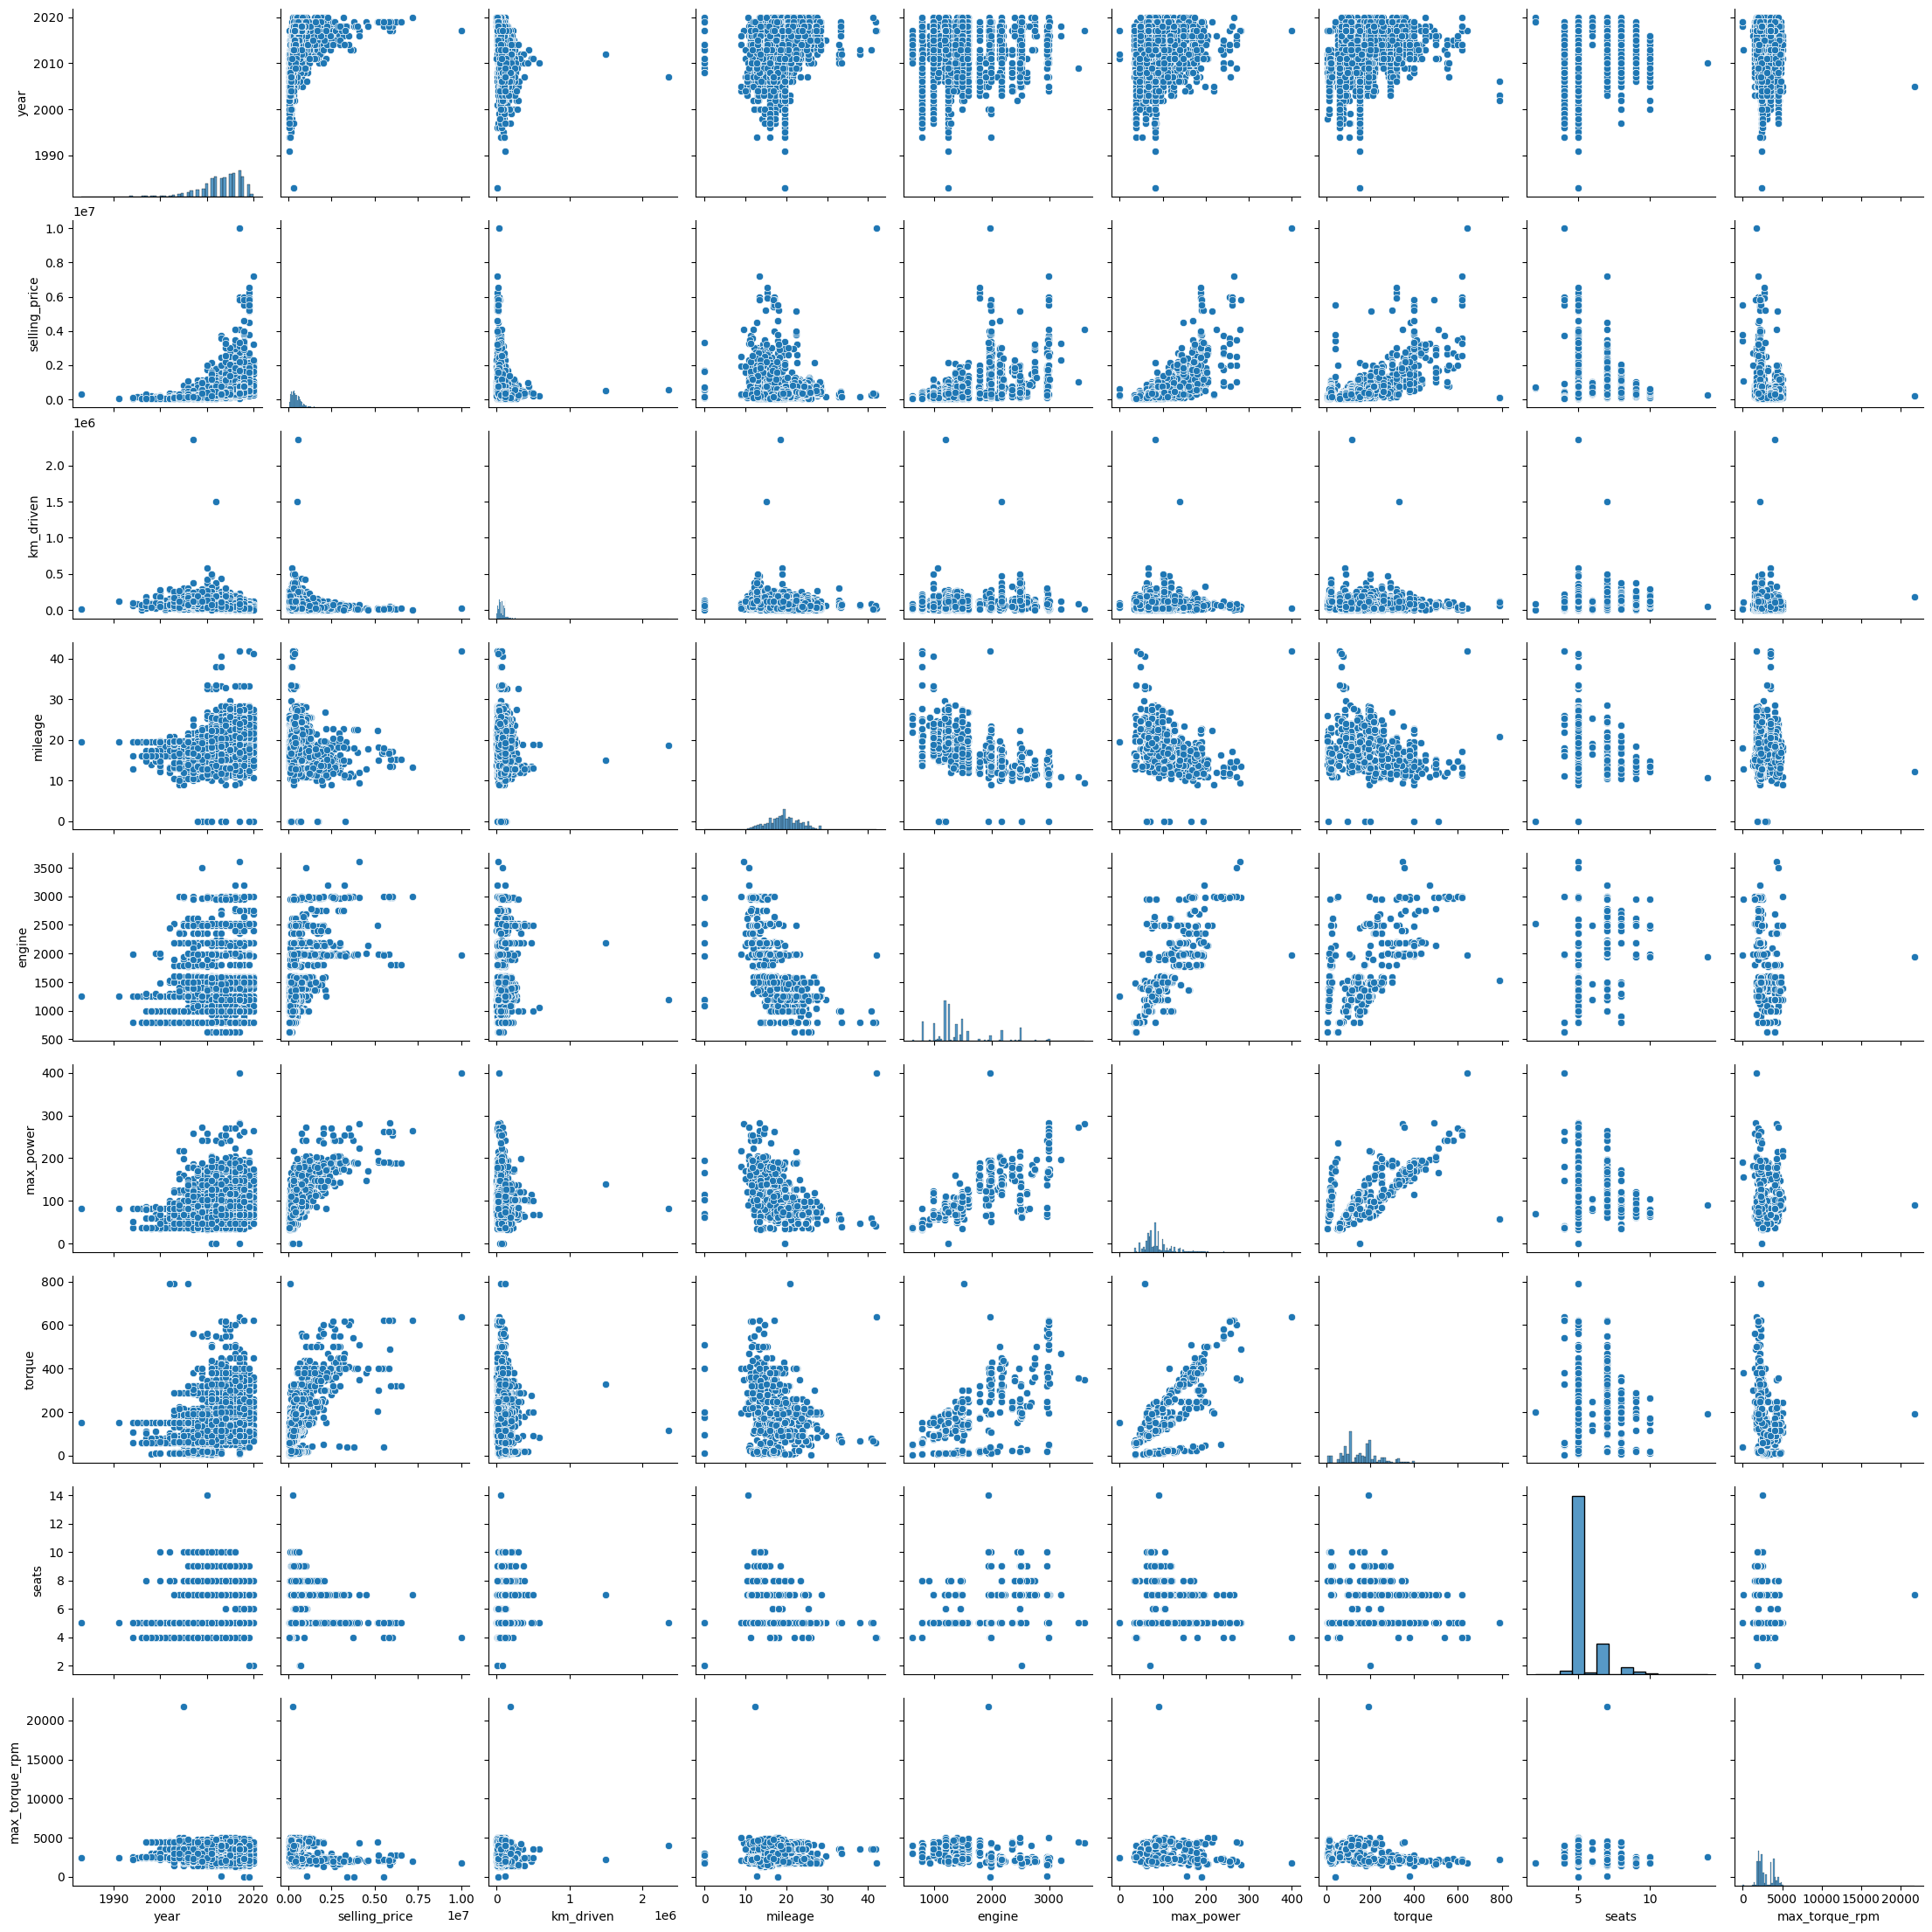

In [22]:
# your code here
sns.pairplot(df_train)
plt.show()

Этот график не такой информативный, как можно было бы построить, беря признаки по отдельности. Но он позволяет сделать некоторые (возможно, далеко идущие) выводы. Впрочем, со многими из них (если не со всеми) вы бы справились умозрительно. Однако всегда приятно делать выводы, основываясь на данных.



* <font color='#FF6600'> Что можно сказать о связи предикторов с целевой переменной?
* А о корреляциях признаков? </font>

In [23]:
print('''ответ:
1)как правило, чем старше автомобиль и меньше пробег - тем ниже цена
2) мощность двигателя в целом безразлична к изменению цены, но в категории машин с двигателеме бОльшей мощности больше машин с высокой стоимостью
3) аналагично можно сказать про max_power - чем больше данный показатель, тем чаще всречаются машины с высокой стоимостью
4) в категории "машины с средними показателями mileage & seats" чаще встречаются автомобили с высокой стоимостью
5)max_torque & torque не очень иноформативны - трудно сказать что-то конкретное


о корреляциях признаков можно сказать следующее:
1) сильная корреляция torque & max_power & engine
2) трудно анализировать из-за выбросов несколько параметров
''')

ответ:
1)как правило, чем старше автомобиль и меньше пробег - тем ниже цена
2) мощность двигателя в целом безразлична к изменению цены, но в категории машин с двигателеме бОльшей мощности больше машин с высокой стоимостью
3) аналагично можно сказать про max_power - чем больше данный показатель, тем чаще всречаются машины с высокой стоимостью
4) в категории "машины с средними показателями mileage & seats" чаще встречаются автомобили с высокой стоимостью
5)max_torque & torque не очень иноформативны - трудно сказать что-то конкретное


о корреляциях признаков можно сказать следующее:
1) сильная корреляция torque & max_power & engine
2) трудно анализировать из-за выбросов несколько параметров 



(0.25 балла) <font color='#9933CC'>Постройте pairplot по тестовым данным</font> и ответьте на вопрос <font color='#FF6600'>"Похожими ли оказались совокупности при разделении на трейн и тест?"</font>

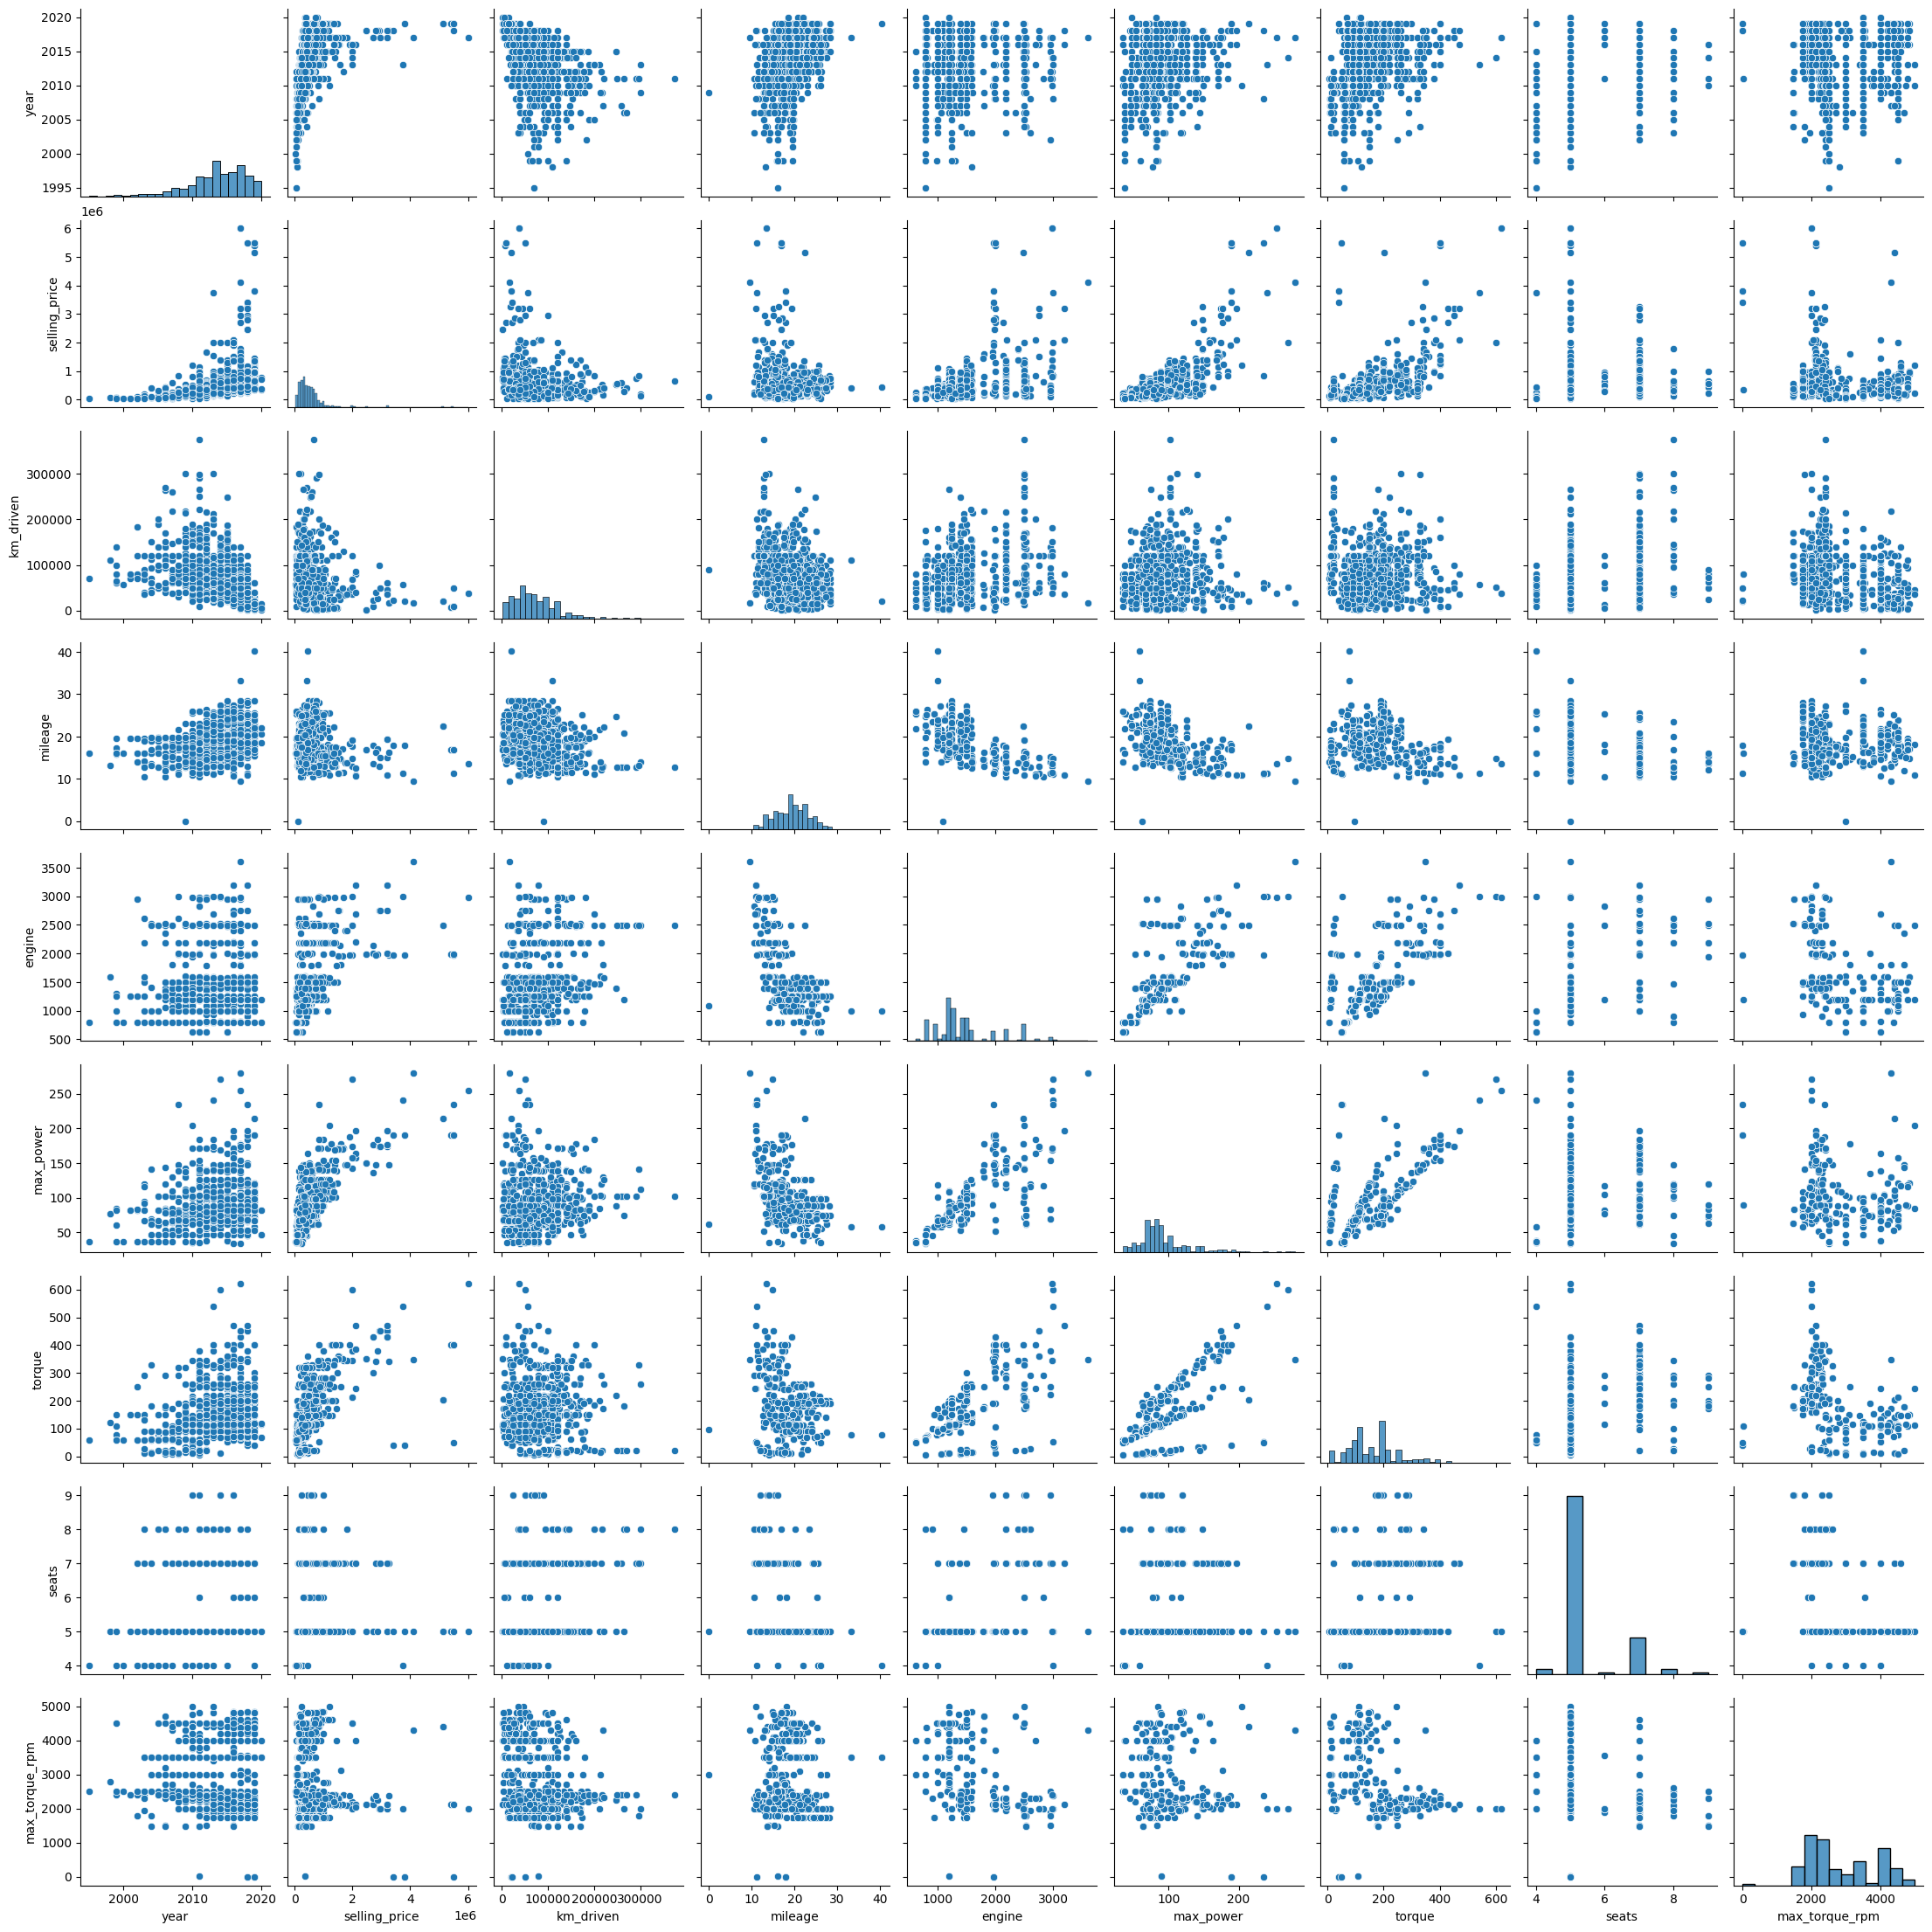

In [24]:
# your code here

sns.pairplot(df_test)
plt.show()

на первый взгляд датафреймы достаточно похожи:

1. похожие распределения для целевой переменной
2. схожая корреляция между фичами связанными с двигателями (обороты мощность и тд)

(0.25 балла) <font color='#9933CC'>Для трейна давайте построим тепловую карту (heatmap из библиотеки seaborn) попарных корреляций числовых колонок</font>

<ipython-input-25-c38dd1bcbbcc>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df_train.corr()


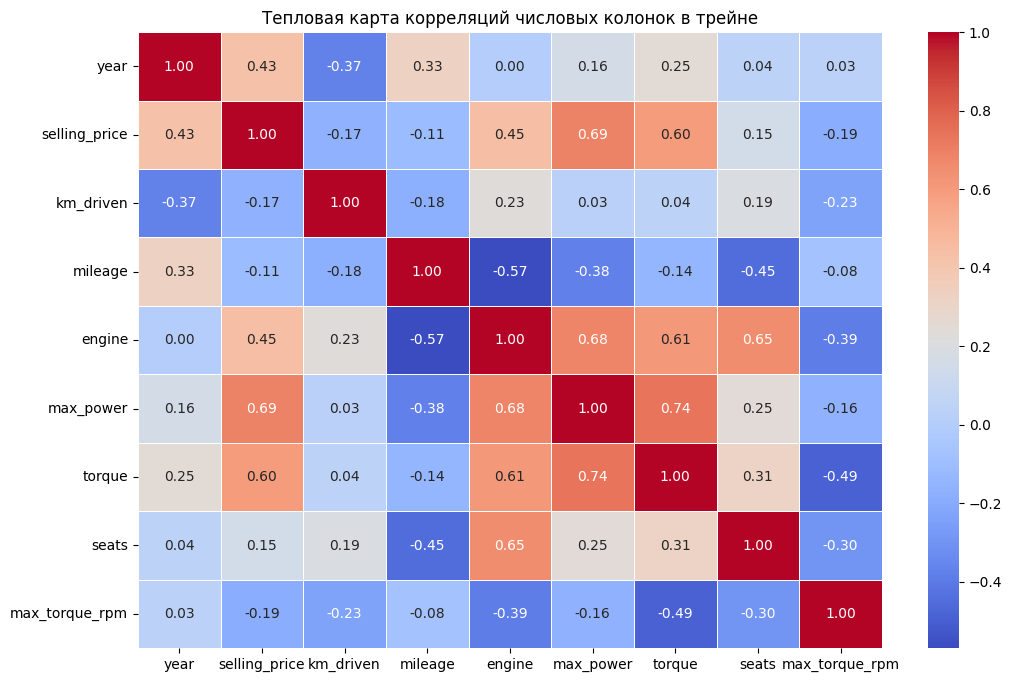

In [25]:
# your code here

correlation_matrix = df_train.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title("Тепловая карта корреляций числовых колонок в трейне")
plt.show()

Ответьте, пожалуйста, на вопросы:
* <font color='#FF6600'>Какие 2 признака наименее скоррелированы между собой?</font>
* <font color='#FF6600'>Между какими наблюдается довольно сильная положительная линейная зависимость?</font>
* <font color='#FF6600'>Правильно ли, опираясь на данные, утверждать, что чем меньше год, тем, скорее всего, больше километров проехала машина к дате продажи.</font>

1. 'engine' & 'year' кк=0
2. самая сильная между 'torque' & 'max_power'
3. данные параметры коррелируют слабо (-0.37), однако, в какой-то степени это верно (отрицательная динамика этому свидетельствует)

(0.25 балла) <font color='#9933CC'> Отобразите диаграммe рассеяния для наиболее скореллированной пары **признаков** (на трейне) </font>

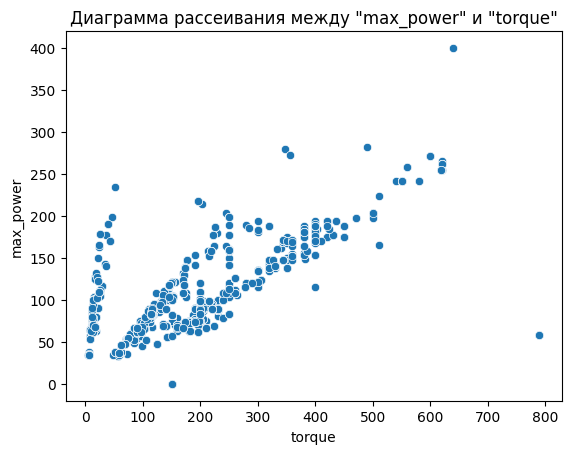

In [26]:
# your code here
sns.scatterplot(x=df_train['torque'], y=df_train['max_power'], data=df_train[['max_power','torque']])
plt.title('Диаграмма рассеивания между "max_power" и "torque"')
plt.show()

### Дополнительные визуализации (бонус 0.5 балла)

Если вам кажется, что мы не попросили вас нарисовать какие-то очень важные зависимости, нарисуйте их и поясните.

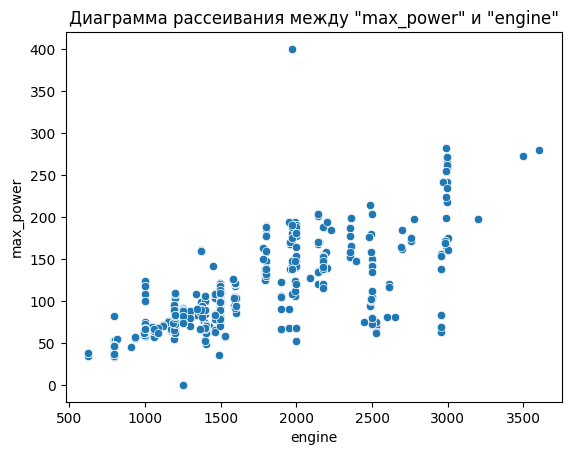

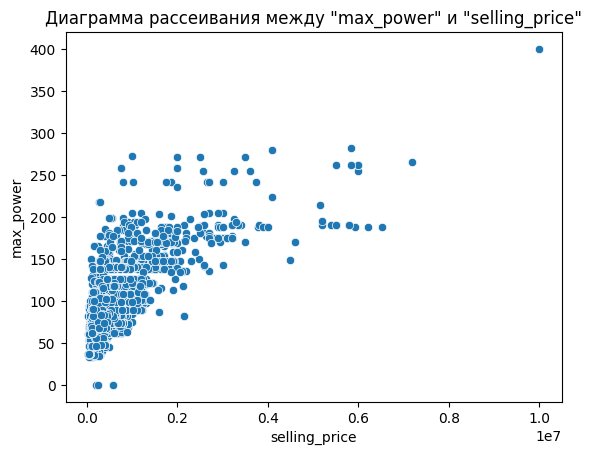

In [27]:
# your code here
sns.scatterplot(x=df_train['engine'], y=df_train['max_power'], data=df_train[['max_power','engine']])
plt.title('Диаграмма рассеивания между "max_power" и "engine"')
plt.show()

sns.scatterplot(x=df_train['selling_price'], y=df_train['max_power'], data=df_train[['max_power','selling_price']])
plt.title('Диаграмма рассеивания между "max_power" и "selling_price"')
plt.show()


max_power также сильно коррелирует с engine и, самое главное, целевой переменной selling_price. вероятно, данный параметр будет иметь существенный вклад в модель

# Часть 2 (1.25 балла) | Модель только на вещественных признаках

(0.05 балла) <font color='#9933CC'>В переменные ``y_train`` и ``y_test`` запишите значения целевых переменных. Столбцы ``selling_price`` из датафреймов необходимо удалить. Категориальные (все, кроме ``seats``) столбцы тоже.</font>

In [28]:
X_train = df_train[['km_driven',
                   'mileage',
                   'engine',
                   'max_power',
                   'torque',
                   'max_torque_rpm']]
y_train = df_train['selling_price']

In [29]:
y_test = df_test['selling_price']
X_test = df_test[['km_driven',
                   'mileage',
                   'engine',
                   'max_power',
                   'torque',
                   'max_torque_rpm']]

In [30]:
assert X_test.shape == (1000, 6)

(0.2 балла) <font color='#9933CC'>Обучите классическую линейную регрессию с дефолтными параметрами. Посчтитайте $R^2$ и MSE для трейна и для теста</font>

**Замечание:** $R^2$ и MSE для трейна и для теста выводите везде, где требуется обучать модели, даже если в явном виде этого не просят. Иначе непонятно, как понять, насколько успешны наши эксперименты.

In [31]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error as MSE

# your code here

linear = LinearRegression()

linear.fit(X_train, y_train)

y_pred = linear.predict(X_test)

print(r2_score(y_test,y_pred))
print(MSE(y_test,y_pred))

0.5685016979033692
248037545754.64743


Запомните правило:

> Использую линейную модель -- стандартизирую фичи

(0.25 балла) <font color='#9933CC'>Воспользуемся им</font>


In [32]:
from sklearn.preprocessing import StandardScaler

# your code here

stand = StandardScaler()

X_train_stand = stand.fit_transform(X_train)

X_test_stand = stand.transform(X_test)

linear.fit(X_train_stand, y_train)

y_pred = linear.predict(X_test_stand)

print(r2_score(y_test,y_pred))
print(MSE(y_test,y_pred))

0.5685016979033697
248037545754.64713


Не очень результативно.

Зато уже сейчас можем интерпретировать модель. <font color='#FF6600'>"Какой признак оказался наиболее информативным в предсказании цены?"</font>

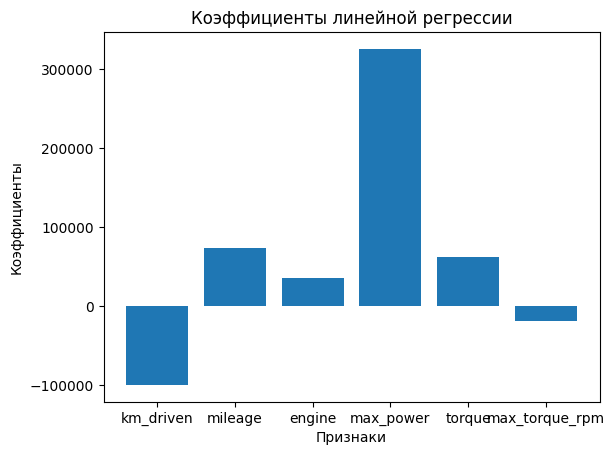

In [33]:
# your code here

coefficients = linear.coef_

plt.bar(X_train.columns, coefficients)
plt.xlabel('Признаки')
plt.ylabel('Коэффициенты')
plt.title('Коэффициенты линейной регрессии')
plt.show()

max_power оказался самым информативным

(0.25 балла) <font color='#9933CC'>Теперь попробуем Lasso-регрессию.</font> Здесь и дальше обучайте модели на нормализованных признаках

In [34]:
from sklearn.linear_model import Lasso

# your code here

lasso = Lasso()

lasso.fit(X_train_stand, y_train)

y_pred = lasso.predict(X_test_stand)

print(r2_score(y_test,y_pred))
print(MSE(y_test,y_pred))

0.5685005737414017
248038191955.0475


<font color='#FF6600'>Занулила ли L1-регуляризация с параметрами по умолчанию какие-нибудь веса? Почему же?</font>

вроде не занулила. скорее всего, потому что мало параметров и модели некогда было разгуляться на небольшом df, также alpha = 1

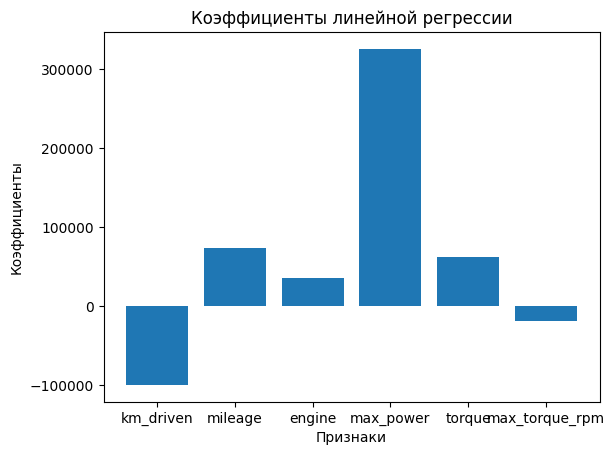

[-99718.2106381   74014.35151735  35646.2683303  326241.33420939
  62303.93578307 -19356.82127537]


In [35]:
# your code here

coefficients = lasso.coef_

plt.bar(X_train.columns, coefficients)
plt.xlabel('Признаки')
plt.ylabel('Коэффициенты')
plt.title('Коэффициенты линейной регрессии')
plt.show()

print(coefficients)

(0.25 балла) <font color='#9933CC'>Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для Lasso-регрессии</font>

Вам пригодится класс [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html).

In [36]:
%%time

from sklearn.model_selection import GridSearchCV

# your code here
lasso = Lasso()
param_grid = {
    'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000],
    'fit_intercept': [True, False],
    'max_iter': [100, 500, 1000]
}


grid_search = GridSearchCV(lasso, param_grid, cv=10)


grid_search.fit(X_train_stand, y_train)

print("Best parameters: ", grid_search.best_params_)

Best parameters:  {'alpha': 10000, 'fit_intercept': True, 'max_iter': 100}
CPU times: user 3.33 s, sys: 2.63 s, total: 5.96 s
Wall time: 3.17 s


0.5560886353059158
255172928598.59113


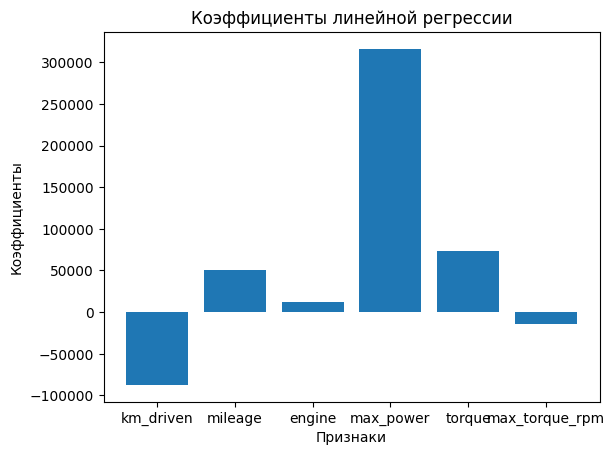

[-87185.33244655  50967.5453957   12032.02662125 316135.44762846
  73222.90354076 -13628.50861587]


In [37]:

lasso = Lasso(alpha=10000)

lasso.fit(X_train_stand, y_train)

y_pred = lasso.predict(X_test_stand)

print(r2_score(y_test,y_pred))
print(MSE(y_test,y_pred))


coefficients = lasso.coef_

plt.bar(X_train.columns, coefficients)
plt.xlabel('Признаки')
plt.ylabel('Коэффициенты')
plt.title('Коэффициенты линейной регрессии')
plt.show()

print(coefficients)

In [38]:
from sklearn.metrics import SCORERS

# Получение списка имен метрик
scorer_names = list(SCORERS.keys())

# Вывод списка
print(scorer_names)

['explained_variance', 'r2', 'max_error', 'matthews_corrcoef', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'top_k_accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'positive_likelihood_ratio', 'neg_negative_likelihood_ratio', 'adjusted_rand_score', 'rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'ja

<font color='#FF6600'>Сколько грид-сёрчу пришлось обучать моделей?</font>

2,6 секунд

<font color='#FF6600'>Какой коэффициент регуляризации у лучшей из перебранных моделей? Занулились ли какие-нибудь из весов при такой регуляризации?</font>

коэффициент регуляризации (a) = 10000, занулился вес параметра engine

(0.25 балла) <font color='#9933CC'>Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для [ElasticNet](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html)-регрессии</font>

In [39]:
from sklearn.linear_model import ElasticNet

# your code here

elastic = ElasticNet()

elastic.fit(X_train_stand, y_train)

y_pred = elastic.predict(X_test_stand)

print(r2_score(y_test, y_pred))
print(MSE(y_test, y_pred))

0.4633252723126552
308495958564.1719


<font color='#FF6600'>Какие гиперпараметры соответствуют лучшей из перебранных моделей?</font>

In [40]:
# your code here
elastic_net = ElasticNet()


param_grid = {
    'alpha': [0.1, 0.5, 1.0],
    'l1_ratio': [0.1, 0.5, 0.9]
}


grid_search = GridSearchCV(estimator=elastic_net, param_grid=param_grid, cv=10, scoring='r2')


grid_search.fit(X_train_stand, y_train)


print("Лучшие гиперпараметры:", grid_search.best_params_)



Лучшие гиперпараметры: {'alpha': 0.5, 'l1_ratio': 0.5}


Предлагаем вам оставить вам попытки заметно улучшить качество модели регуляризацией и перейти к следующей части задания.

# Часть 3 (0.5 балла) | Добавляем категориальные фичи



(0 баллов) <font color='#9933CC'>Из ``df_train`` удалите столбцы с целевой переменной и названием автомобиля.</font>

In [41]:
# your code here

X_train_cat = df_train.drop(['selling_price', 'name'], axis = 1)

In [42]:
X_train_cat.describe(include='object')

,fuel,seller_type,transmission,owner
count,6014,6014,6014,6014
unique,4,3,2,5
top,Diesel,Individual,Manual,First Owner
freq,3269,5394,5505,3721


(0.5 балла) <font color='#9933CC'>Закодируйте категориалльные фичи и ``seats`` методом OneHot-кодирования</font>

> Обратите внимание, что во избежание мультиколлинеарности следует избавиться от одного из полученных столбцов при кодировании каждого признака методом OneHot.

In [43]:
from sklearn.preprocessing import OneHotEncoder # или можно использовать get_dummies из библиотеки pandas

# your code here

X_test_cat = df_test.drop(['selling_price', 'name'], axis = 1)


encoder = OneHotEncoder(sparse=False, drop='first')  # drop='first' для избежания dummy-ловушки


encoded_train = encoder.fit_transform(X_train_cat[['seats', 'fuel', 'seller_type', 'transmission', 'owner']])
encoded_test = encoder.transform(X_test_cat[['seats', 'fuel', 'seller_type', 'transmission', 'owner']])


encoded_df_train = pd.DataFrame(encoded_train, columns=encoder.get_feature_names_out(['seats', 'fuel', 'seller_type', 'transmission', 'owner']))
encoded_df_test = pd.DataFrame(encoded_test, columns=encoder.get_feature_names_out(['seats', 'fuel', 'seller_type', 'transmission', 'owner']))


X_train_ohe = pd.concat([X_train_cat, encoded_df_train], axis=1)
X_test_ohe = pd.concat([X_test_cat, encoded_df_test], axis=1)


X_train_ohe = X_train_ohe.drop(['seats', 'fuel', 'seller_type', 'transmission', 'owner'], axis=1)
X_test_ohe = X_test_ohe.drop(['seats', 'fuel', 'seller_type', 'transmission', 'owner'], axis=1)


# X_train_ohe

X_test_ohe

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,year,km_driven,mileage,engine,max_power,torque,max_torque_rpm,seats_4,seats_5,seats_6,...,fuel_Diesel,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
0,2010,168000,14.00,2498,112.00,260.00,2000.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
1,2017,25000,21.50,1497,108.50,260.00,2125.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
2,2007,218463,12.90,1799,130.00,172.00,4300.0,0.0,1.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2015,173000,25.10,1498,98.60,200.00,1750.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
4,2011,70000,16.50,1172,65.00,96.00,3000.0,0.0,1.0,0.0,...,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,2008,100000,19.81,1086,68.05,99.04,4500.0,0.0,1.0,0.0,...,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
996,2017,50000,18.60,1197,81.83,114.70,4000.0,0.0,1.0,0.0,...,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
997,2009,40000,23.00,1396,90.00,22.40,2250.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
998,2012,25000,20.36,1197,78.90,111.80,4000.0,0.0,1.0,0.0,...,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0


In [44]:
stand = StandardScaler()

X_train_stand = stand.fit_transform(X_train_ohe)

X_test_stand = stand.transform(X_test_ohe)

In [45]:
X_train_stand

array([[ 0.13544137,  1.20350472,  0.93769853, ..., -0.62543069,
        -0.0257984 , -0.28677276],
       [ 0.13544137,  0.77569394,  0.38727235, ...,  1.5988982 ,
        -0.0257984 , -0.28677276],
       [-0.84505144,  0.89313219,  0.84027797, ..., -0.62543069,
        -0.0257984 , -0.28677276],
       ...,
       [-0.10968183,  0.607925  , -0.25570336, ..., -0.62543069,
        -0.0257984 , -0.28677276],
       [-1.58042105,  0.75891704, -0.66974075, ..., -0.62543069,
        -0.0257984 , -0.28677276],
       [-1.09017465,  0.77569394, -0.06086224, ..., -0.62543069,
        -0.0257984 , -0.28677276]])

(0.25 балла) <font color='#9933CC'>Переберите параметр регуляризации `alpha` для гребневой (ridge) регрессии с помощью класса `GridSearchCV`.</font> В качестве параметров при объявлении GridSearchCV кроме модели укажите метрику качества $R^2$. Кроссвалидируйтесь по 10-ти фолдам.

<font color='#FF6600'>Удалось ли улучшить качество предсказаний?</font>

In [46]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

# your code here


ridge = Ridge()

param_grid = {'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000, 30000]}


grid_search = GridSearchCV(lasso, param_grid, scoring='r2', cv=10)


grid_search.fit(X_train_stand, y_train)


print("Best parameters: ", grid_search.best_params_)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.989e+14, tolerance: 1.262e+11
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.618e+14, tolerance: 1.596e+11
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.576e+14, tolerance: 1.565e

Best parameters:  {'alpha': 10}


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.370e+13, tolerance: 1.714e+11
  model = cd_fast.enet_coordinate_descent(


0.6378694625338276
208162973804.25345


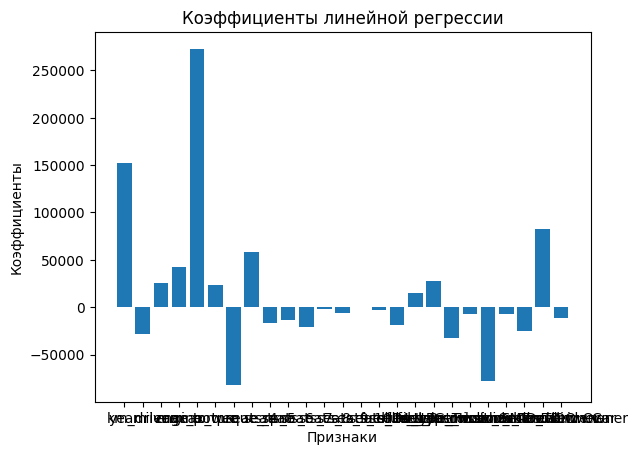

[152218.6793587  -28835.07383226  25645.46266656  42130.17851476
 272760.94518895  23230.56943716 -81914.19154595  58734.34896638
 -16463.65329803 -13782.88154324 -20893.96518572  -2272.55058984
  -5875.91609354    535.36502209  -2474.15876554 -19166.64331082
  14946.20592388  27517.03637032 -32080.22780295  -6906.68387436
 -78280.3341878   -6897.13209249 -25064.53022692  82873.67784468
 -10998.64343828]


In [47]:
ridge = Ridge(alpha= 10)

ridge.fit(X_train_stand, y_train)

y_pred = ridge.predict(X_test_stand)

print(r2_score(y_test,y_pred))
print(MSE(y_test,y_pred))


coefficients = ridge.coef_

plt.bar(X_train_ohe.columns, coefficients)
plt.xlabel('Признаки')
plt.ylabel('Коэффициенты')
plt.title('Коэффициенты линейной регрессии')
plt.show()

print(coefficients)

качество по метрике r2 улучшилось с 0.567 о 0.637

# Часть 4 - бонусная (1.5 балла) | Feature Engineering

В этой части домашнего задания вам предлагается проявить свою креативность для улучшения прогноза модели. Любые другие модели, кроме различных форм линейной (или полиномиальной) регресси, использовать запрещается. А значит, придется работать с признаками

**Что можно попробовать сделать?** (каждый пункт по 0.4 балла, но не больше 2-х баллов в сумме)

1.   *Сгенерировать новые признаки на основе уже существующих:*
    * посчитать произведения // частные признаков (кажется, что посчитать число "лошадей" на литр объема может быть полезно);
    * имеет смысл обратить внимание на визуализации в части с EDA (к примеру, зависимость цены от года выглядит квадратичной, а не линейной; значит, квадрат года нам, скорее всего, принесет больше пользы)

2.   *Добыть новые признаки:*
    * имеем название автомобиля, которое никак не используем (можно спарсить инфу о классе автомобиля или каких-то специфических опциях)
    * можно добавить пороговые признаки вроде "владелец третий или больше" и объединить признаки в некоторые осмысленные правила, например "первый или второй владелец и продавец официальный дилер" (подбирать пороги удобно по диаграммам рассеяния)

3.   *Поработать с уже имеющимися:*
    * далеко не факт, что заполнить пропуск медианой было лучшей идеей (как минимум, можно добавить dummy-столбец для модели, сигнализирующий, что раньше на месте медианы был пропуск -- там где он был, конечно); попробуйте другие способы филлинга;
    * мы не анализировали, есть ли в данных выбросы => никак выбросы не обрабатывали; наиболее простым и, тем не менее, довольно полезным вариантом нахождения выбросов могут послужить boxplot'ы для каждого столбца; что делать с выбросами думайте сами :) -- вариантов довольно много
    * мы толком не смотрели на таргет сам по себе; в нем тоже могут быть неожиданности -- стоит хотя бы проверить
    * можно заметить, что некоторые признаки распределены совсем не нормально; возможно их стоит отлогарифмировать

И так далее...

Feel Free to Try!

In [48]:
# your code here

# Часть Бизнесовая (0.5 балла)

Заказчик просил вас посчитать кастомную метрику -- среди всех предсказанных цен на авто посчитать долю предиктов, отличающихся от реальных цен на эти авто не более чем на 10% (в одну или другую сторону)

<font color='#9933CC'>Сделайте это самостоятельно для лучшей из своих моделей</font>

In [49]:
def business_metrics(y_true, y_pred):
    # your code here
    percent_difference = abs((y_pred - y_true) / y_true) * 100

    # количество предиктов (при 10% разбросе)
    correct_predictions = sum(percent_difference <= 10)

    # Рассчитываем accuracy
    accuracy = correct_predictions / len(y_true)

    return accuracy


business_metrics(y_test, y_pred)

0.237

# Часть 5 (2.5 балла) | Реализация сервиса на FastAPI

Cделайте с помощью FastAPI сервис, который с точки зрения пользователя реализует две функции:

1. на вход в формате json подаются признаки одного объекта, на выходе сервис выдает предсказанную стоимость машины
2. на вход подается csv-файл с признаками тестовых объектов, на выходе получаем файл с +1 столбцом - предсказаниями на этих объектах

С точки зрения реализации это означает следующее:
- средствами pydantic должен быть описан класс базового объекта
- класс с коллецией объектов
- метод post, который получает на вход один объект описанного класса
- метод post, который получает на вход коллекцию объектов описанного класса

Шаблон для сервисной части дан ниже. Код необходимо дополнить и оформить в виде отдельного .py-файла.

In [50]:
import pickle


with open('ridge_model.pkl', 'wb') as model_file:
    pickle.dump(ridge, model_file)

In [ ]:
from fastapi import FastAPI
from pydantic import BaseModel
from typing import List
import joblib

model = joblib.load('ridge_model.pkl')

app = FastAPI()


class Item(BaseModel):
    name: str
    year: int
    selling_price: int
    km_driven: int
    fuel: str
    seller_type: str
    transmission: str
    owner: str
    mileage: str
    engine: str
    max_power: str
    torque: str
    seats: float


class Items(BaseModel):
    objects: List[Item]


@app.post("/predict_item")
def predict_item(item: Item) -> float:

    prediction = [model.predict(obj) for obj in item.objects]

    return prediction


@app.post("/predict_items")
def predict_items(items: List[Item]) -> List[float]:

    predictions = [model.predict(obj) for obj in items.objects]

    return predictions


@app.post("/predict_items_csv")
def predict_items_csv(items: Items) -> FileResponse:

    predictions = [ridge.predict(obj) for obj in items.objects]

    with NamedTemporaryFile(delete=False, suffix=".csv") as temp_file:
        df = pd.DataFrame({"Prediction": predictions})
        df.to_csv(temp_file.name, index=False)


    return FileResponse(temp_file.name, filename="predictions.csv")

Протестируйте сервис на корректность работы и приложите скриншоты (см. ниже).

# Часть 6 (1 балл) | Оформление результатов

**Результаты вашей работы** необходимо разместить в своем Гитхабе. Под результатами понимаем следующее:
* ``.ipynb``-ноутбук со всеми проведёнными вами экспериментами (output'ы ячеек, разумеется, сохранить)
* ``.py``-файл с реализацией сервиса
* ``.pickle``-файл с сохранёнными весами модели, коэффициентами скейлинга и прочими числовыми значениями, которые могут понадобиться для инференса
* ``.md``-файл с выводами про проделанной вами работе:
    * что было сделано
    * с какими результатами
    * что дало наибольший буст в качестве
    * что сделать не вышло и почему (это нормально, даже хорошо😀)

**За что могут быть сняты баллы в этом пункте:**
* за отсутствие ``.pickle``-файла с весами использованной модели
* за недостаточную аналитику в ``.md``-файле
* за оформление и логику кода (в определённом смысле это тоже элемент оформления решения)

**Как будет выглядет проверка всего домашнего задания?**
1. Ассистент проходит по ссылке на (**открытый**) репозиторий из Энитаска
2. Смотрит ``readme.md``:
    * пожалуйста, приложите в него же скрины работы вашего сервиса -- собирать ваши проекты довольно времязатратно, но хочется убедиться, что всё работает
    * можете прислать screencast в ТГ
3. Просматривает ноутбук с pure-DS частью
4. Заглядывает в код сервиса
5. Хвалит

# Часть Благодарственная

Надеемся, вы честно проделали все пункты, а не просто пролистали досюда. Потому что здесь награда за старания. Пожалуйста, не стоит награждать себя до того, как закончите работать над домашкой.

https://drive.google.com/file/d/1LT06nyg9QgVi3r-D5BY-_mQ9TcJQFxJN/view?usp=share_link